In [ ]:
import os
import sys
import codecs
import gensim
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
with open('/content/stopwords.txt', 'r', encoding='utf-8') as f:
    stop_words = f.read().splitlines()

# Загружаем дополнительно стоп-слова из NLTK
stop_words.extend(stopwords.words('russian'))
# Избавляемся от дубликатов
stw = list(stop_words)

In [ ]:
import zipfile
from zipfile import ZipFile

# открываем зипфайл и читаем его
with zipfile.ZipFile('/content/CWV.zip', 'r') as z:
  z.extractall('CWV')

print('Done')

In [ ]:
corpus_files = os.listdir('CWV/CWV')

In [ ]:
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru
import pymorphy2 as pm
morph = pm.MorphAnalyzer()

nltk.download('punkt')

docs = []
# Предобрабатываем данные (предобработка одинаковая для всех моделей)
for ind, txt in enumerate(corpus_files):
    with open('CWV/CWV//' + txt, 'r', encoding='utf-8') as f:
        text = nltk.word_tokenize(f.read().lower())
        text = [token for token in text if len(token) > 2]
        text = [morph.parse(token)[0].normal_form for token in text if token not in stop_words]

    with open('cwv_new.txt', 'a', encoding='utf-8') as g:
        g.write('\n'.join(text))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
model = Word2Vec(LineSentence('/content/cwv_new.txt'),
                 vector_size=150,
                 window=1,
                 min_count=5,
                 workers=2)
model.init_sims(replace=True)#clearmemory
model.save('agac.model')

<ipython-input-17-4899a05df544>:6: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)#clearmemory


In [ ]:
m=Word2Vec.load('agac.model')

In [ ]:
for t in m.wv.most_similar(
    positive=[u'тема'],
    topn=10):
    print (t[0], t[1])

словосочетание 0.2713514566421509
отклонение 0.2629016637802124
однозначный 0.25456103682518005
сервис 0.21817566454410553
исходный 0.20098769664764404
присутствовать 0.187544584274292
достижение 0.17859354615211487
важный 0.17708662152290344
степень 0.17553845047950745
понятность 0.17419439554214478


In [ ]:
model.wv.similarity("тема", "модель")

-0.026275167

In [ ]:
for t in m.wv.most_similar(
    positive=[u'моделирование'],
    topn=10):
    print (t[0], t[1])

вероятность 0.218373641371727
система 0.21630661189556122
возможность 0.20979483425617218
имя 0.20176918804645538
соответствие 0.193699911236763
дальнейший 0.18890121579170227
честь 0.18350517749786377
справа 0.17592546343803406
элементарный 0.1745530217885971
найти 0.17005859315395355


In [ ]:
for t in m.wv.most_similar(
    positive=[u'язык'],
    topn=10):
    print (t[0], t[1])

отвечать 0.22465559840202332
особенность 0.20593029260635376
кодирование 0.20455044507980347
процесс 0.20444752275943756
ситуация 0.20412950217723846
выявление 0.2040136307477951
эффективность 0.19493205845355988
обозначать 0.17859335243701935
полный 0.1736636459827423
ситуативный 0.17100518941879272


In [ ]:
for t in m.wv.most_similar(
    positive=[u'корпус'],
    topn=10):
    print (t[0], t[1])

контекст 0.2758943438529968
укладка 0.19133694469928741
предложение 0.18602581322193146
адресат 0.17027367651462555
цифровой 0.16995222866535187
виртуальный 0.16841761767864227
текст 0.16760919988155365
ситуативный 0.15844441950321198
потребность 0.15370216965675354
объём 0.15276256203651428


In [ ]:
for t in m.wv.most_similar(
    positive=[u'обработка'],
    topn=10):
    print (t[0], t[1])

необходимо 0.20405925810337067
понятие 0.20276904106140137
решение 0.18554669618606567
запрос 0.1819687783718109
оставаться 0.18043272197246552
отбор 0.17488837242126465
рамка 0.16666537523269653
граф 0.16522300243377686
морфоанализатор 0.1637609302997589
лексический 0.16353276371955872


In [ ]:
for t in m.wv.most_similar(
    positive=[u'лингвистика'],
    topn=10):
    print (t[0], t[1])

использование 0.23029468953609467
шаблон 0.2056879848241806
информационный 0.19975334405899048
доступ 0.19505248963832855
следующий 0.19421739876270294
россия 0.19058679044246674
разработать 0.1891024112701416
использовать 0.18342241644859314
рис 0.1833161860704422
требовать 0.1800341010093689


In [ ]:
for t in m.wv.most_similar(
    positive=[u'русский'],
    topn=10):
    print (t[0], t[1])

прилагательное 0.24742703139781952
учёт 0.21919168531894684
счёт 0.21770964562892914
частый 0.20906232297420502
лир 0.20539669692516327
представить 0.1947689950466156
хороший 0.19348931312561035
формат 0.1833253800868988
источник 0.18307539820671082
друг 0.18125616014003754


In [ ]:
for t in m.wv.most_similar(
    positive=[u'поиск'],
    topn=10):
    print (t[0], t[1])

граф 0.1886148601770401
подход 0.18650135397911072
строка 0.18470749258995056
языковой 0.1836666464805603
являться 0.18107230961322784
условие 0.1779090166091919
перевод 0.17532706260681152
нейтральный 0.1744997650384903
терминологический 0.17055736482143402
применение 0.1696794182062149


In [ ]:
for t in m.wv.most_similar(
    positive=[u'сеть'],
    topn=10):
    print (t[0], t[1])

значение 0.2316165715456009
страна 0.22576777637004852
проект 0.21992447972297668
падеж 0.20049934089183807
помощь 0.19916854798793793
отсылать 0.18819455802440643
смысловой 0.18617971241474152
фрагмент 0.17627757787704468
рассматриваться 0.174295112490654
рамка 0.17409780621528625


In [ ]:
for t in m.wv.most_similar(positive=['модель', 'тема', 'корпус', 'моделирование'], negative=['язык'], topn=5):
    print (t[0], t[1])

контроль 0.24095796048641205
достижение 0.23567189276218414
наука 0.22522898018360138
честь 0.21297335624694824
однозначный 0.1993536353111267


None


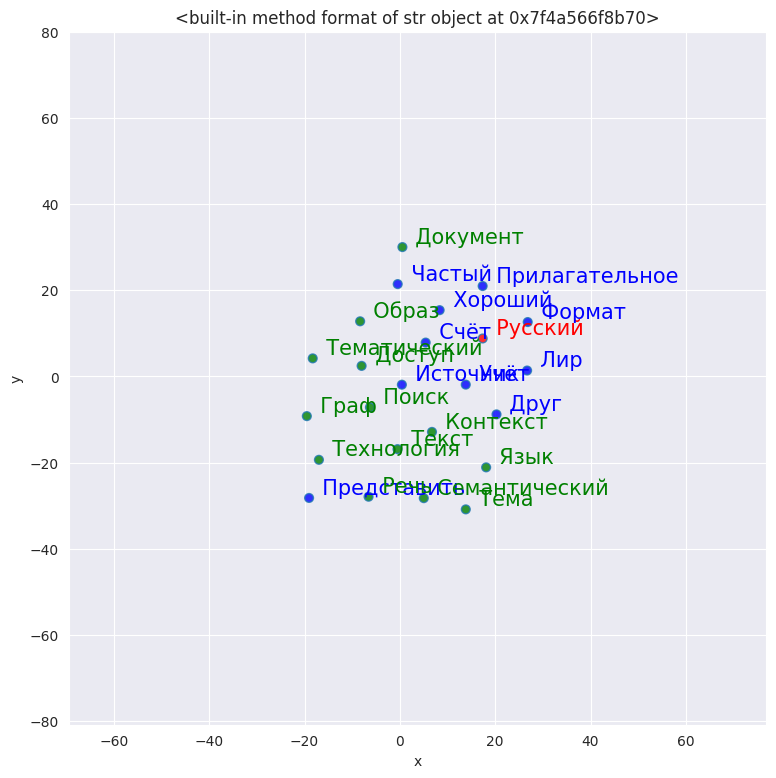

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=4).fit_transform(arrays)

    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)

    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                  }
                     )

    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df['y'][line],
                '  ' + df["words"][line].title(),
                horizontalalignment='left',
                verticalalignment='bottom', size='medium',
                color=df['color'][line],
                weight='normal'
                ).set_size(15)

    plt.xlim(Y[:, 0].min() - 50, Y[:, 0].max() + 50)
    plt.ylim(Y[:, 1].min() - 50, Y[:, 1].max() + 50)

    plt.title('t-SNE visualization for {}'.format)

list_words = ['граф', 'поиск', 'документ', 'тема', 'язык', 'текст','речь', 'образ',
              'семантический', 'тематический', 'контекст', 'технология', 'доступ']

print(tsnescatterplot(model, 'русский', list_words))
